In [2]:
import pandas as pd

# Load data from an Excel file into a DataFrame
# df= 'data.xlsx'
df = pd.read_excel('data.xlsx')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())  

# Separate output with an empty line
print('\n')

# Provide information about the DataFrame's shape (number of rows and columns)
print("DataFrame Shape:")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# Describe the data with basic statistics
print("\nData Description:")
description = df.describe()
formatted_description = description.applymap(lambda x: format(x, 'f'))
print(formatted_description)


First few rows of the DataFrame:
  Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1        

In [3]:
import pandas as pd

# Assuming df is already defined
df.set_index("ID", inplace=True)

# Printing the first few rows of the DataFrame
print(df.head())


       Unnamed: 0   Salary        DOJ                  DOL  \
ID                                                           
203097      train   420000 2012-06-01              present   
579905      train   500000 2013-09-01              present   
810601      train   325000 2014-06-01              present   
267447      train  1100000 2011-07-01              present   
343523      train   200000 2014-03-01  2015-03-01 00:00:00   

                     Designation    JobCity Gender        DOB  10percentage  \
ID                                                                            
203097   senior quality engineer  Bangalore      f 1990-02-19          84.3   
579905         assistant manager     Indore      m 1989-10-04          85.4   
810601          systems engineer    Chennai      f 1992-08-03          85.0   
267447  senior software engineer    Gurgaon      m 1989-12-05          85.6   
343523                       get    Manesar      m 1991-02-27          78.0   

           

In [4]:
# Check for missing values in the "Salary" column
missing_values = df["Salary"].isnull().sum()

# Print a message based on whether missing values are present or not
if missing_values > 0:
    print("Missing values are present.")
else:
    print("No missing values are present.")


No missing values are present.


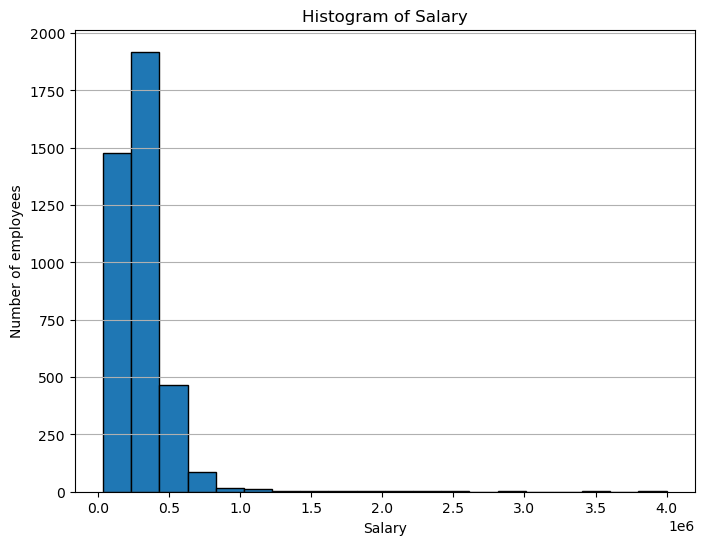

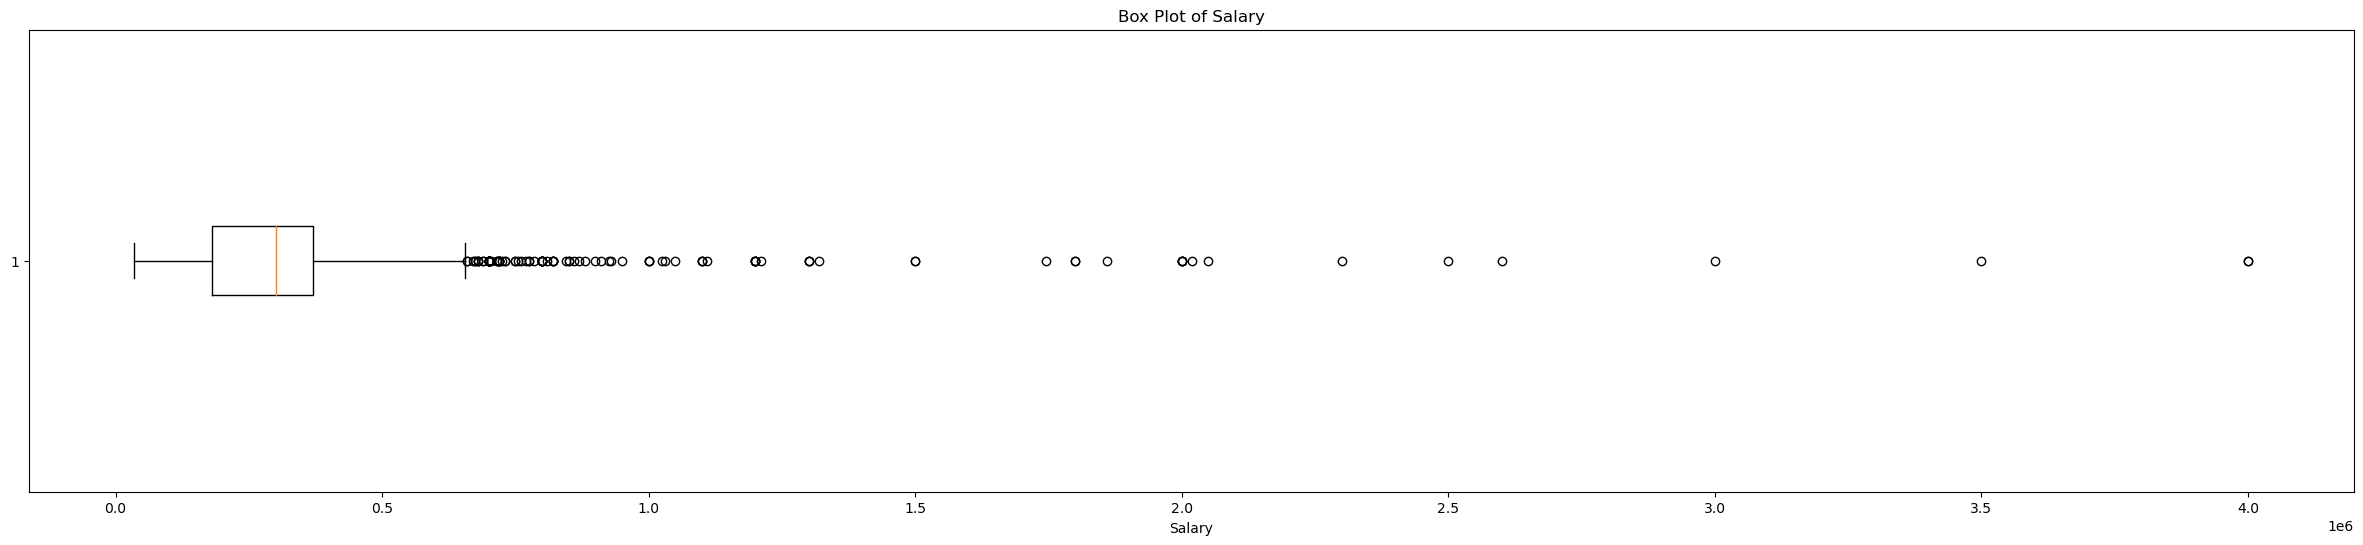

First Quartile (Q1): 180000.0
Third Quartile (Q3): 370000.0
Interquartile Range (IQR): 190000.0


In [15]:
import matplotlib.pyplot as plt

# Histogram of Salary
plt.figure(figsize=(8, 6))
plt.hist(df["Salary"], bins=20, edgecolor="black")
plt.xlabel("Salary")
plt.ylabel("Number of employees")
plt.title("Histogram of Salary")
plt.grid(axis="y")
plt.show()

# Box plot of Salary
plt.figure(figsize=(30,6))
plt.boxplot(df['Salary'], vert=False)
plt.title('Box Plot of Salary')
plt.xlabel('Salary')
plt.show()

# Calculate quartiles and IQR for Salary
q1_S = df["Salary"].quantile(0.25)
q3_S = df["Salary"].quantile(0.75)
iqr_S = q3_S - q1_S

# Print quartiles and IQR
print("First Quartile (Q1):", q1_S)
print("Third Quartile (Q3):", q3_S)
print("Interquartile Range (IQR):", iqr_S)


Salary Distribution Analysis:
The salary distribution appears to be right-skewed, indicating that there are more employees towards the lower end of the salary range and fewer towards the higher end.

### Key Statistics:
Median: The median salary is approximately ₹300,000. This value separates the lower half of the employees from the higher half in terms of salary.
First Quartile (Q1): Around ₹180,000. This indicates that 25% of the employees earn less than ₹180,000.
Third Quartile (Q3): Approximately ₹370,000. This implies that 75% of the employees earn less than ₹370,000.
Interquartile Range (IQR): The IQR, around ₹190,000, represents the range of salaries containing the middle 50% of employees.

### Outliers:
Several outliers are present on the right side of the plot, with salaries exceeding ₹1 million. Further investigation is necessary to determine if these outliers are valid data points or errors.

Note: It's worth noting that outliers beyond the upper whisker of the box plot, particularly those exceeding ₹1 million, may represent rare cases. For instance, as a fresher, it's highly unusual to secure a salary package exceeding 15-20 LPA.

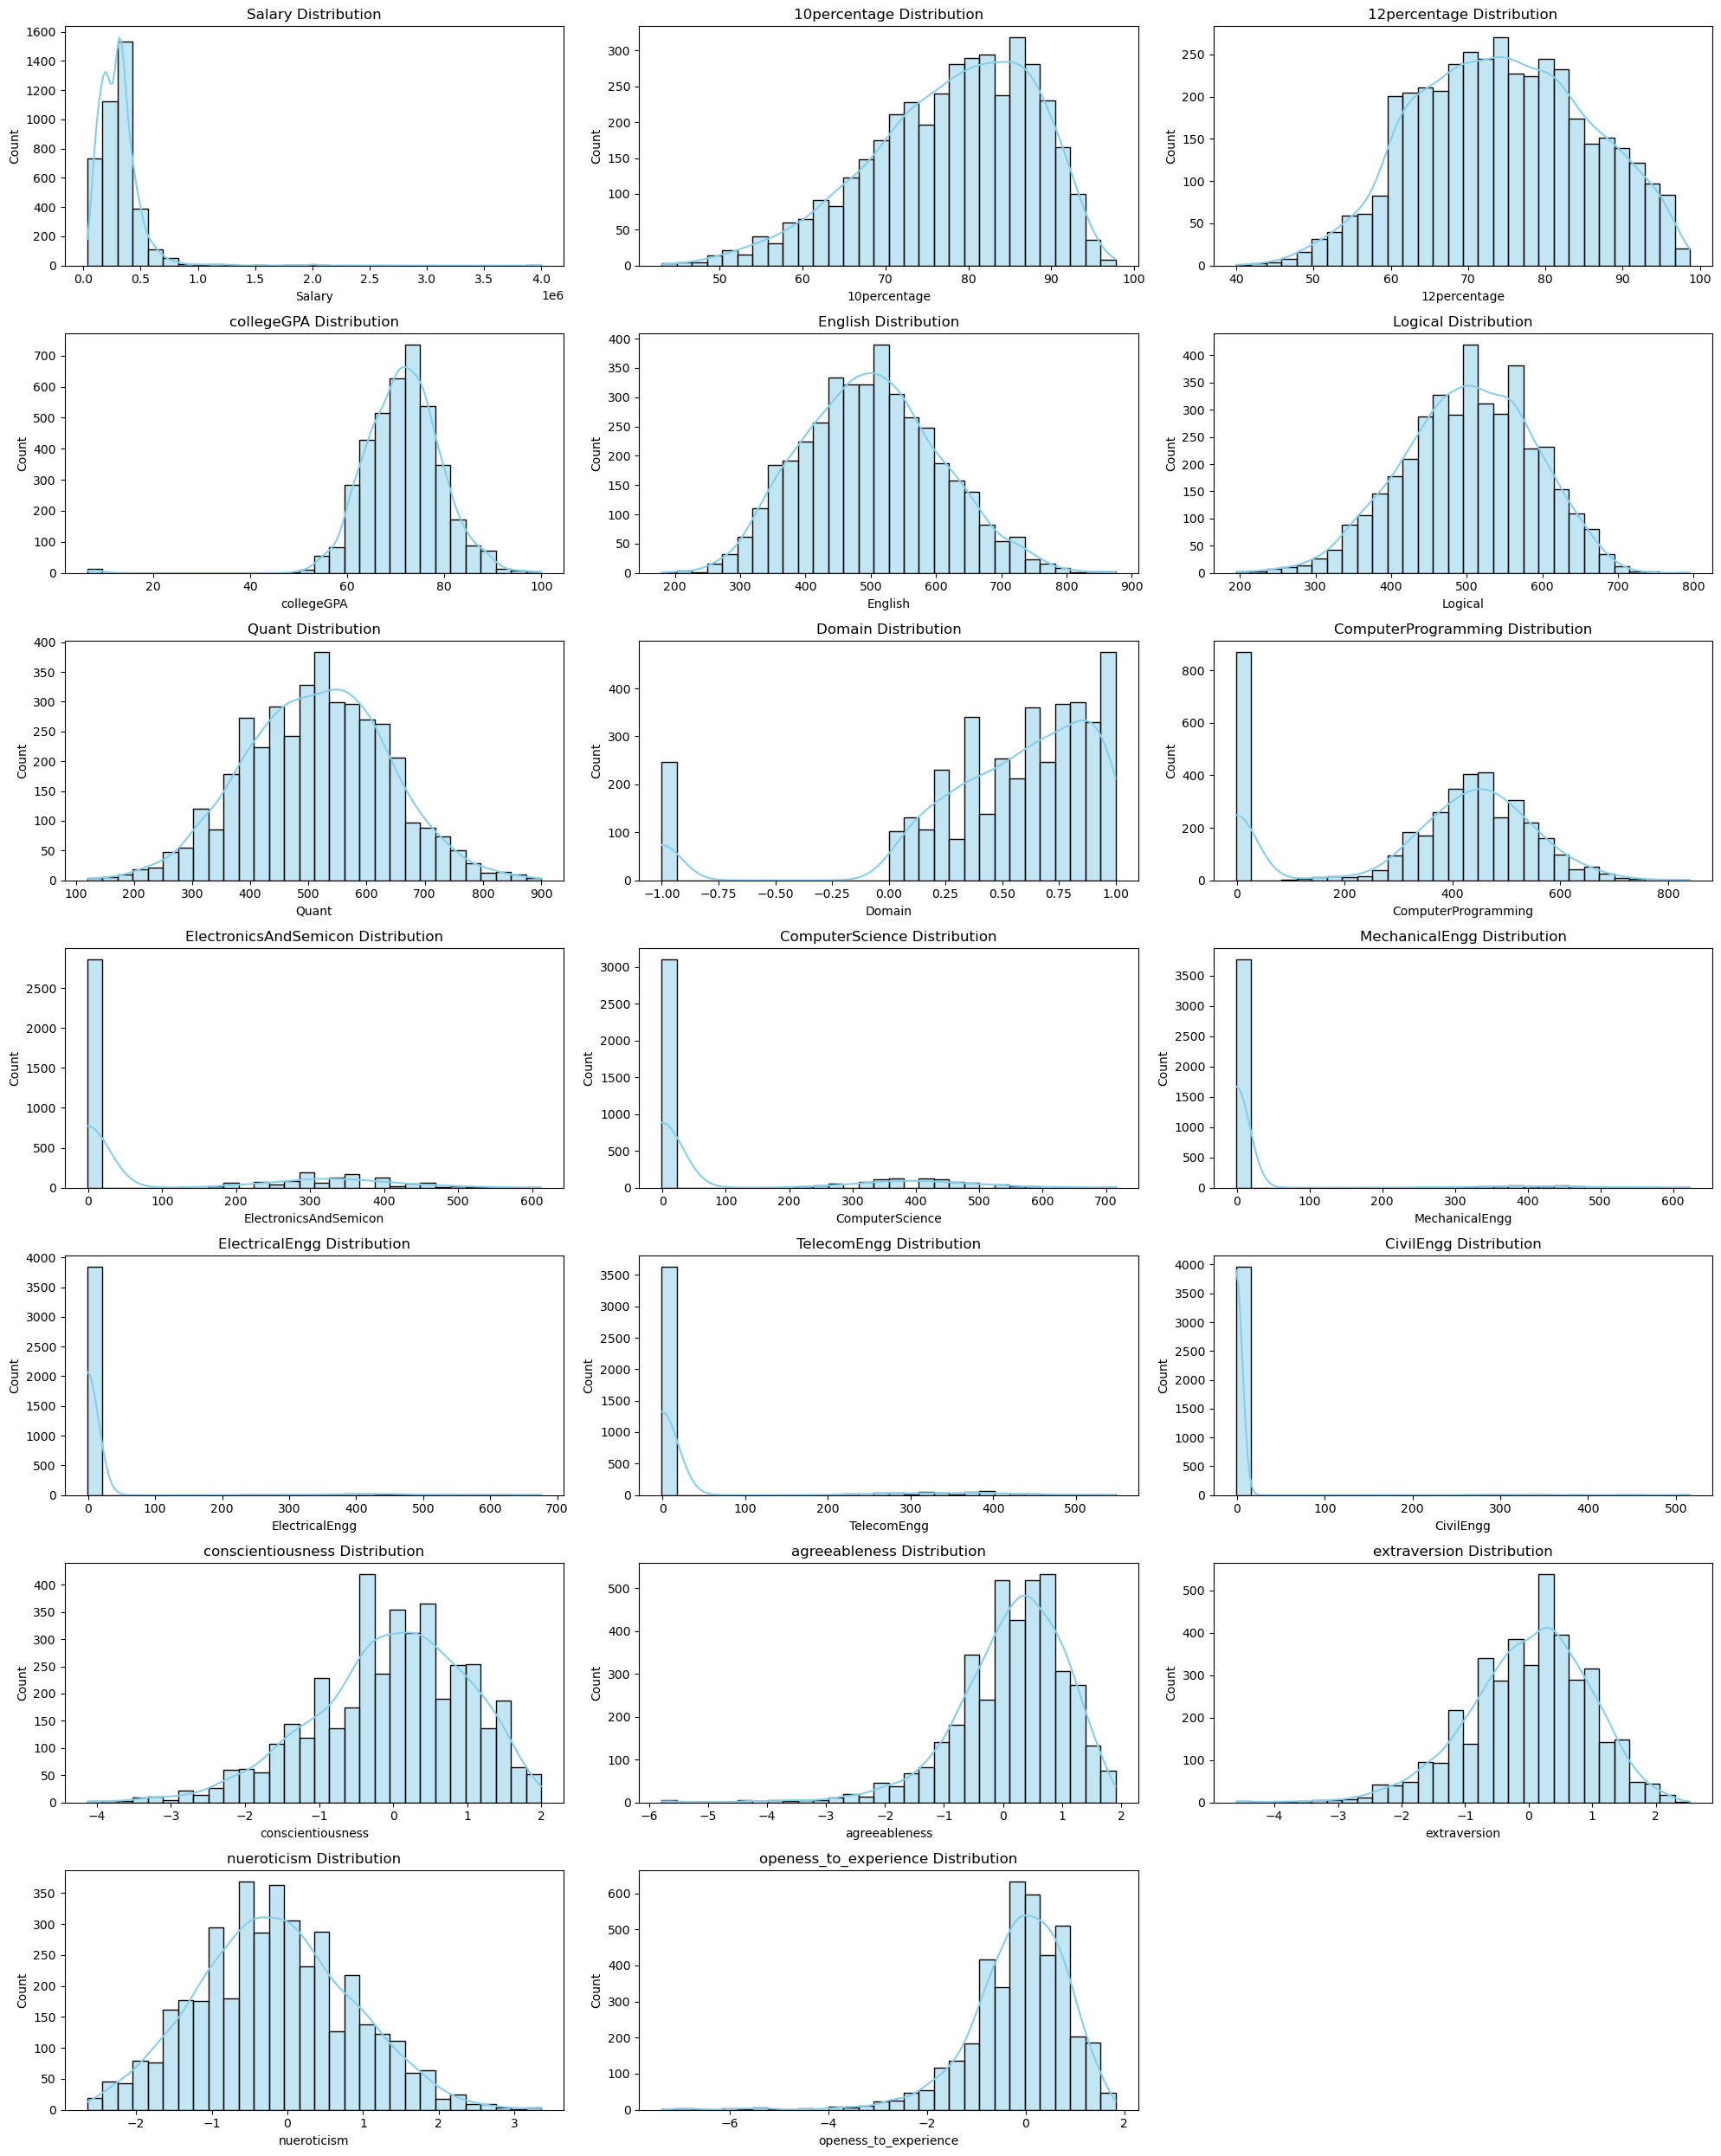

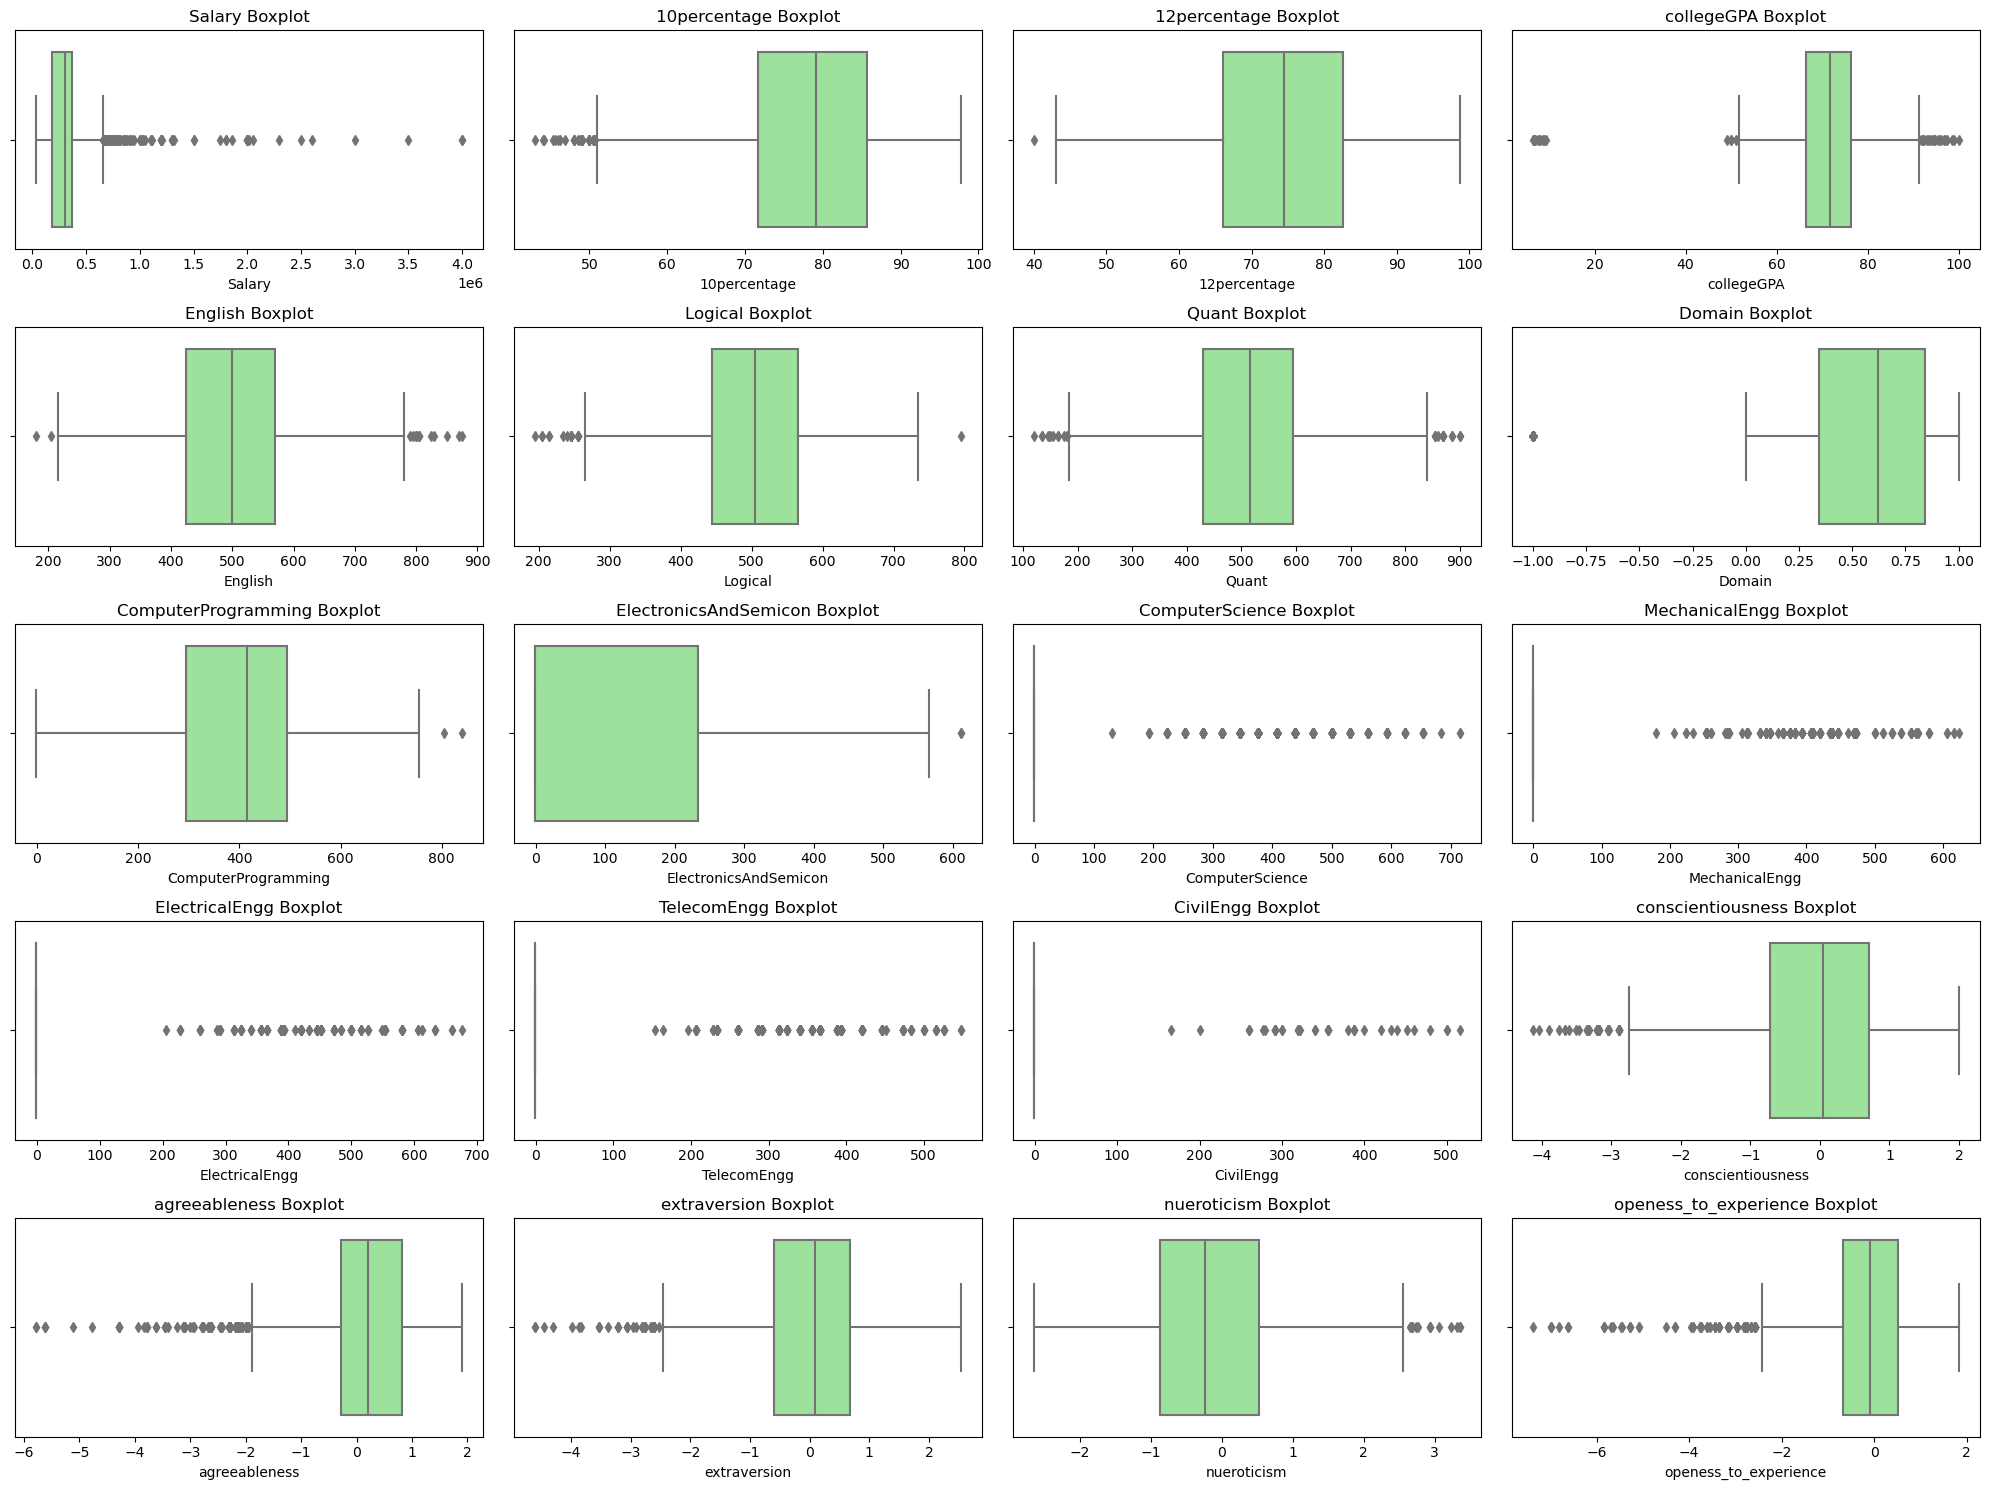

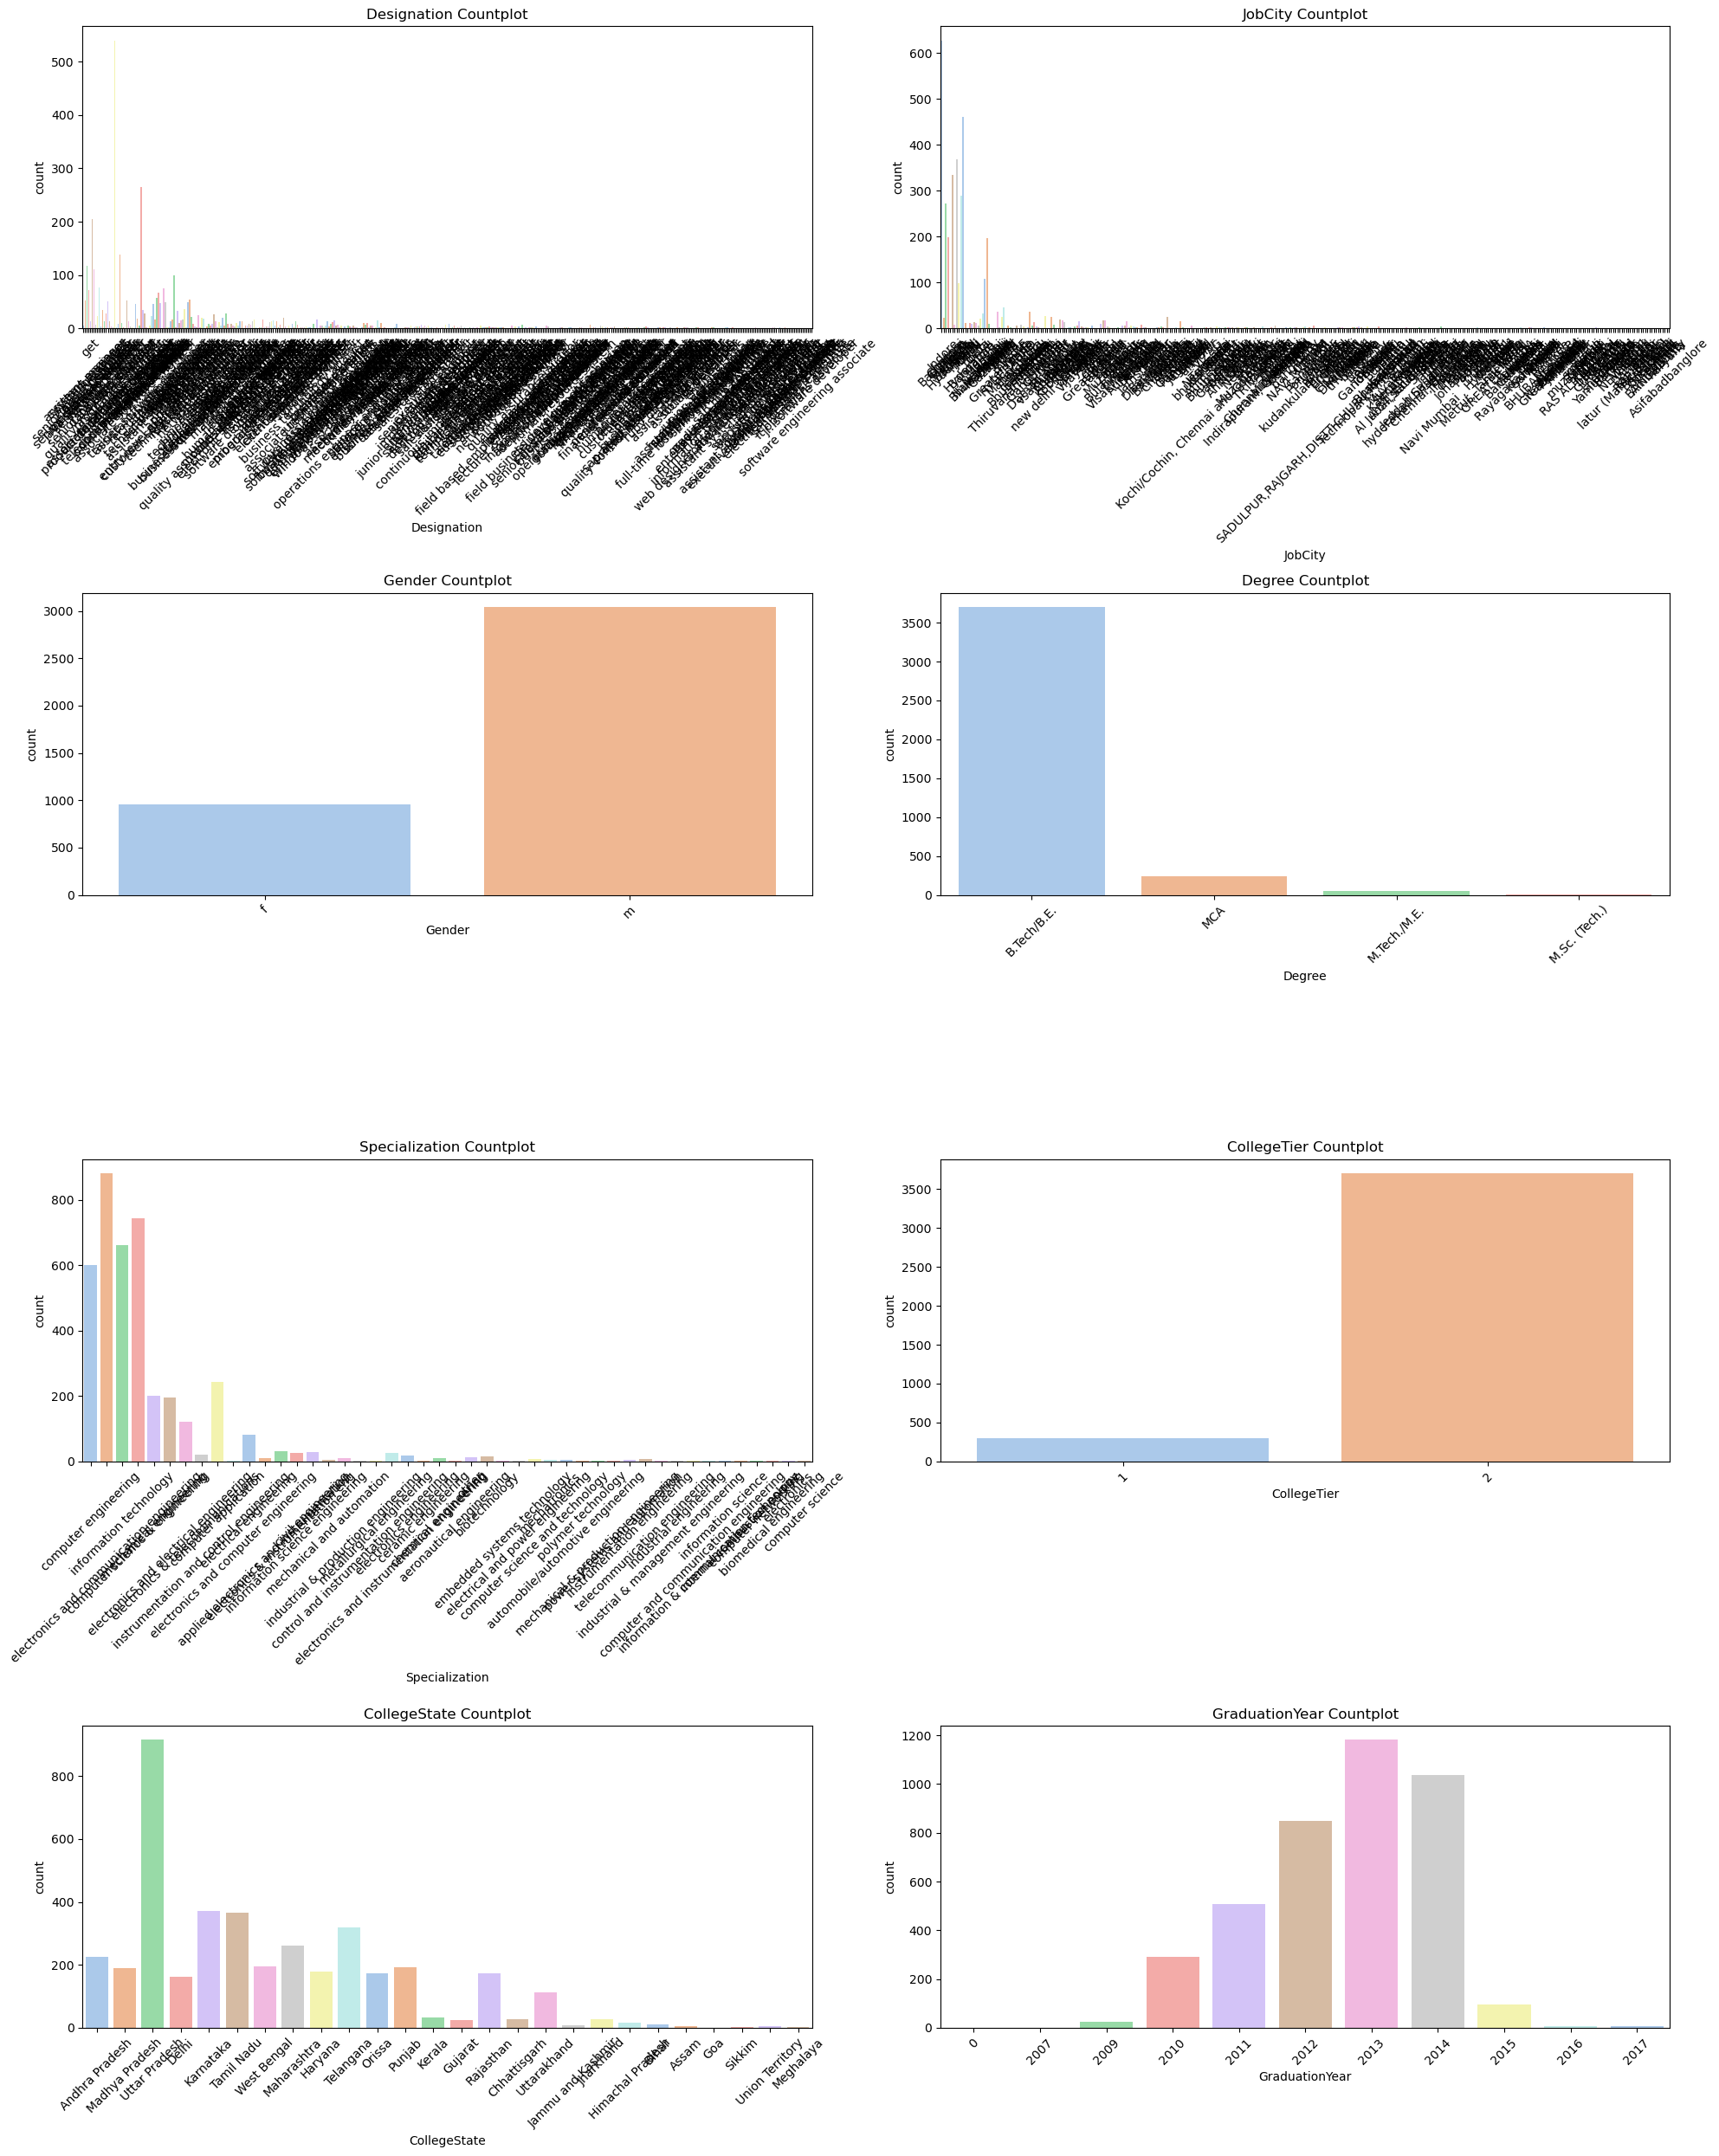

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns of interest
num_cols = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 
            'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 
            'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 
            'extraversion', 'nueroticism', 'openess_to_experience']

# Plot histograms for numerical columns
plt.figure(figsize=(20, 25))
for i, col in enumerate(num_cols, 1):
    plt.subplot(7, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

# Plot boxplots for numerical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

# Define categorical columns of interest
cat_cols = ['Designation', 'JobCity', 'Gender', 'Degree', 'Specialization', 'CollegeTier', 'CollegeState', 'GraduationYear']

# Plot countplots for categorical columns
plt.figure(figsize=(20, 25))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'{col} Countplot')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The visualizations provided above offer valuable insights into the dataset. It's crucial to recognize that these findings are preliminary, and additional analysis is necessary to draw more definitive conclusions from the data.

Given that the salary serves as the target variable, we'll now transition to performing bivariate analysis. However, before delving into bivariate analysis, let's generate a heatmap to examine the correlation matrix. This heatmap will provide a clearer understanding of the relationships between different variables in the dataset.







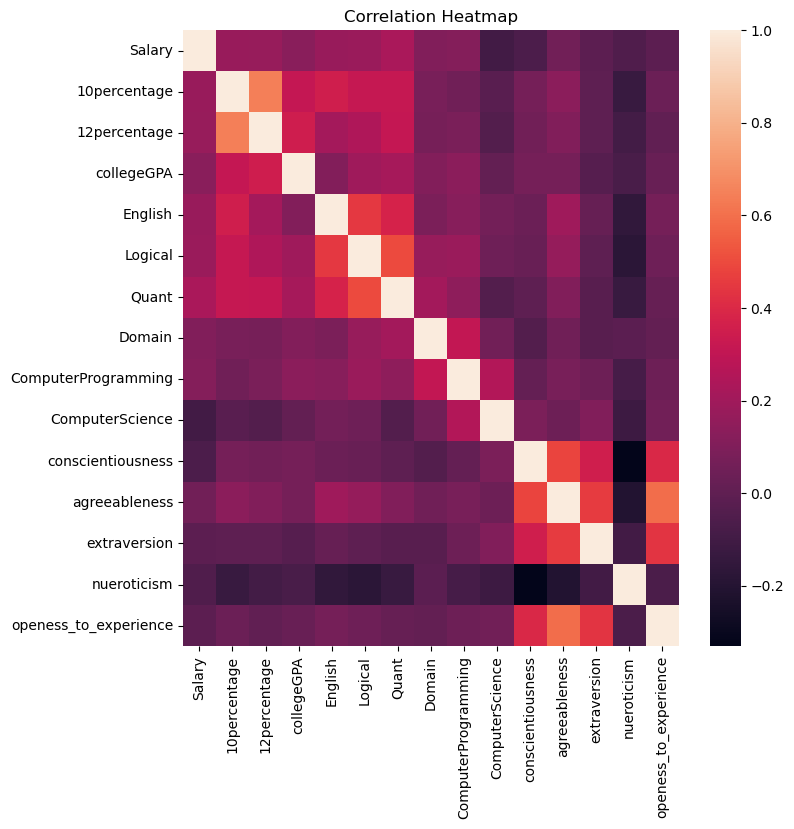

In [12]:
# Select columns starting from the third column
selected_columns = df.columns[2:]

# Define the selected columns of interest
selected_columns = ['Salary', '10percentage', '12percentage', 
                    'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
                    'ComputerProgramming', 'ComputerScience', 'conscientiousness',
                    'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

# Create a DataFrame containing only the selected columns
selected_df = df[selected_columns]

# Display the first few rows of the selected DataFrame
selected_df.head()

# Calculate the correlation matrix
corr_matrix = selected_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 8), dpi=100)
sns.heatmap(selected_df.corr())
plt.title('Correlation Heatmap')
plt.show()


### Overview:
The heatmap provides insights into the correlation coefficients among various numerical variables within your dataset, with a focus on "Salary" as the target variable.
The color gradient spans from blue (indicating negative correlation) to yellow (suggesting positive correlation), with deeper hues signifying stronger correlations.
Notably, the heatmap maintains symmetry, meaning the correlation between variables X and Y mirrors that between Y and X.

### Detailed Analysis:
Academic Performance: A moderate positive correlation is observed between "Salary" and "collegeGPA". However, the relationships with "10percentage" and "12percentage" appear to be less robust.
Skillsets: Numerous skills exhibit positive correlations with "Salary", with notable examples including "ComputerProgramming", "Quant", and "Domain". It's worth mentioning that "English" also demonstrates a slight positive correlation.
Personality Traits: The correlations between personality traits and "Salary" vary, predominantly falling within the realm of weak and diverse. While "Conscientiousness" and "Openess_to_experience" display slight positive trends, "Extraversion" and "Neuroticism" exhibit faint negative correlations.

### Possible Interpretations:
Enhanced academic performance, particularly in higher education ("collegeGPA"), may be linked to higher salaries. However, earlier academic achievements (represented by "10percentage" and "12percentage") seem to exert a diminished influence.
Technical proficiencies such as "ComputerProgramming", "Quant", and "Domain" appear to correlate positively with "Salary", hinting at their potential significance in the job market. The positive correlation with "English" could be attributed to communication and soft skills crucial across various professions.
The subdued and varied correlations between personality traits and "Salary" suggest that personality alone may not fully dictate income within this dataset. Nonetheless, further analysis could delve into potential interactions among different traits and their cumulative impact on salary levels.







Designation
junior manager                       1.300000e+06
senior developer                     1.110000e+06
data scientist                       8.966667e+05
field engineer                       8.016667e+05
asst. manager                        8.000000e+05
software engineer trainee            7.816667e+05
research scientist                   7.300000e+05
branch manager                       7.125000e+05
sales account manager                7.100000e+05
technical lead                       6.690000e+05
technology lead                      6.450000e+05
automation engineer                  6.406667e+05
technical analyst                    6.000000e+05
sr. database engineer                6.000000e+05
technology analyst                   5.691667e+05
business technology analyst          5.650000e+05
planning engineer                    5.525000e+05
manager                              5.525000e+05
business consultant                  5.500000e+05
senior quality assurance engineer    5

Text(0, 0.5, 'Average Salary')

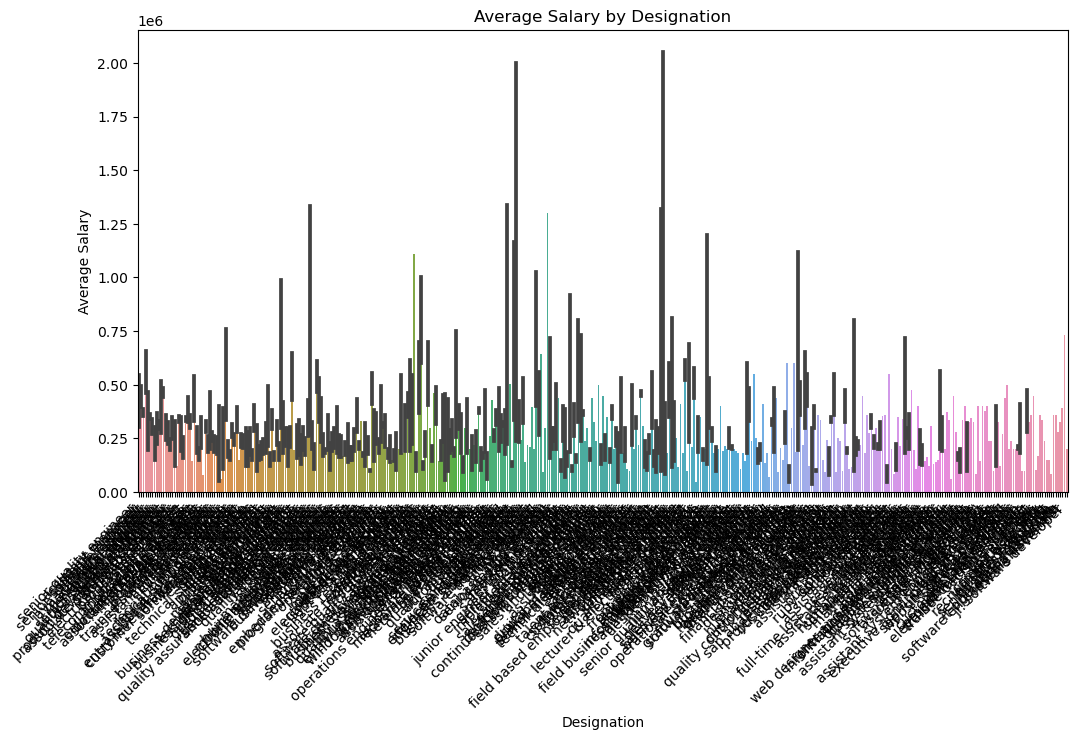

In [13]:
# Obtain unique designations
unique_designations = df['Designation'].unique()

# Calculate the average salary by designation
avg_salary_by_designation = df.groupby('Designation')['Salary'].mean()

# Sort the average salary values in descending order
sorted_avg_salary = avg_salary_by_designation.sort_values(ascending=False)

# Select the top 10 designations with the highest average salary
top_10_designations_highest_salary = sorted_avg_salary.head(50)

# Print the top 10 designations with the highest average salary
print(top_10_designations_highest_salary)

# Plot a bar chart showing the average salary by designation
plt.figure(figsize=(12, 6))
sns.barplot(x='Designation', y='Salary', data=df)
plt.title('Average Salary by Designation')
plt.xticks(rotation=45, ha='right')  
plt.xlabel('Designation')
plt.ylabel('Average Salary')
# plt.show()


In [14]:
# Calculate average salary by '10percentage'
avg_salary_by_10percentage = df.groupby('10percentage')['Salary'].mean()

# Calculate average salary by '10board'
avg_salary_by_10board = df.groupby('10board')['Salary'].mean()

# Calculate average salary by '12graduation'
avg_salary_by_12graduation = df.groupby('12graduation')['Salary'].mean()

# Calculate average salary by '12percentage'
avg_salary_by_12percentage = df.groupby('12percentage')['Salary'].mean()

# Calculate average salary by '12board'
avg_salary_by_12board = df.groupby('12board')['Salary'].mean()

# Calculate average salary by 'CollegeTier'
avg_salary_by_CollegeTier = df.groupby('CollegeTier')['Salary'].mean()

# Calculate average salary by 'Degree'
avg_salary_by_Degree = df.groupby('Degree')['Salary'].mean()

# Calculate average salary by 'Specialization'
avg_salary_by_Specialization = df.groupby('Specialization')['Salary'].mean()

# Calculate average salary by 'collegeGPA'
avg_salary_by_collegeGPA = df.groupby('collegeGPA')['Salary'].mean()

# Calculate average salary by 'CollegeCityTier'
avg_salary_by_CollegeCityTier = df.groupby('CollegeCityTier')['Salary'].mean()

# Calculate average salary by 'CollegeState'
avg_salary_by_CollegeState = df.groupby('CollegeState')['Salary'].mean()

# Calculate average salary by 'GraduationYear'
avg_salary_by_GraduationYear = df.groupby('GraduationYear')['Salary'].mean()

# Print average salary by each variable
print("Average Salary by 10percentage:\n", avg_salary_by_10percentage)
print("\nAverage Salary by 10board:\n", avg_salary_by_10board)
print("\nAverage Salary by 12graduation:\n", avg_salary_by_12graduation)
print("\nAverage Salary by 12percentage:\n", avg_salary_by_12percentage)
print("\nAverage Salary by 12board:\n", avg_salary_by_12board)
print("\nAverage Salary by CollegeTier:\n", avg_salary_by_CollegeTier)
print("\nAverage Salary by Degree:\n", avg_salary_by_Degree)
print("\nAverage Salary by Specialization:\n", avg_salary_by_Specialization)
print("\nAverage Salary by collegeGPA:\n", avg_salary_by_collegeGPA)
print("\nAverage Salary by CollegeCityTier:\n", avg_salary_by_CollegeCityTier)
print("\nAverage Salary by CollegeState:\n", avg_salary_by_CollegeState)
print("\nAverage Salary by GraduationYear:\n", avg_salary_by_GraduationYear)



Average Salary by 10percentage:
 10percentage
43.00    110000.0
44.00    150000.0
44.16    215000.0
45.33    145000.0
45.60    100000.0
           ...   
96.48    550000.0
96.80    300000.0
97.00    200000.0
97.12    510000.0
97.76    800000.0
Name: Salary, Length: 851, dtype: float64

Average Salary by 10board:
 10board
0                                                     3.795714e+05
aisse                                                 1.650000e+05
andhra pradesh board ssc                              5.500000e+05
andhra pradesh state board                            2.300000e+06
anglo indian                                          3.683333e+05
                                                          ...     
wbbse                                                 2.509375e+05
west bengal  board of secondary education             2.500000e+05
west bengal board of secondary education              3.730000e+05
west bengal board of secondary eucation               3.650000e+05
west be

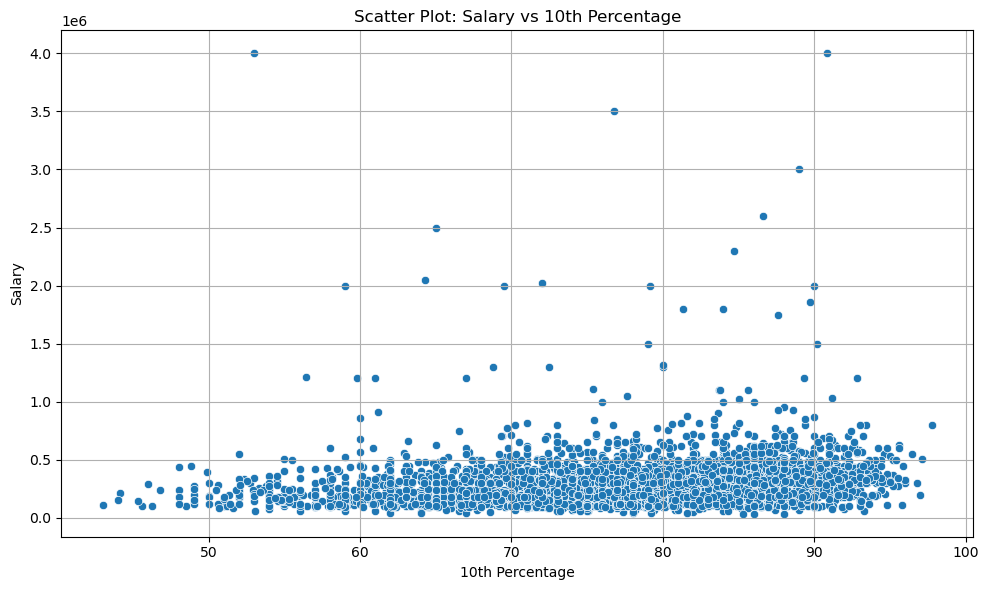

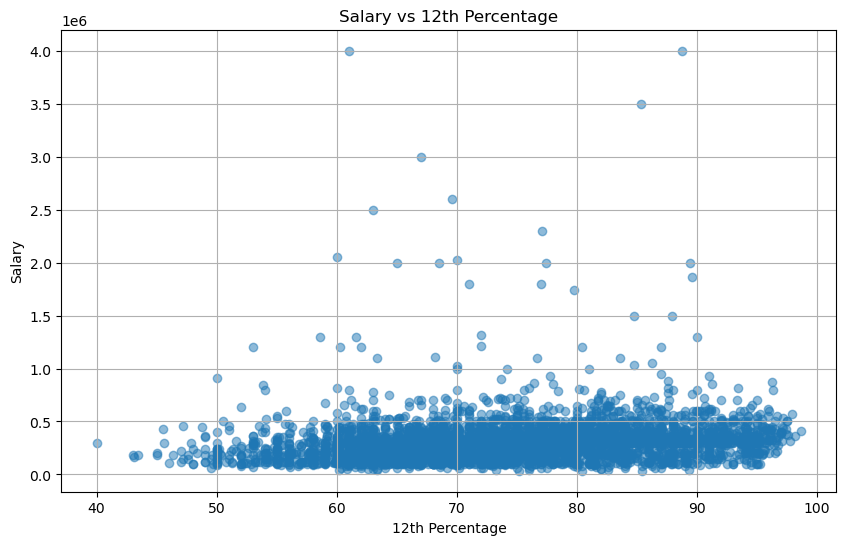

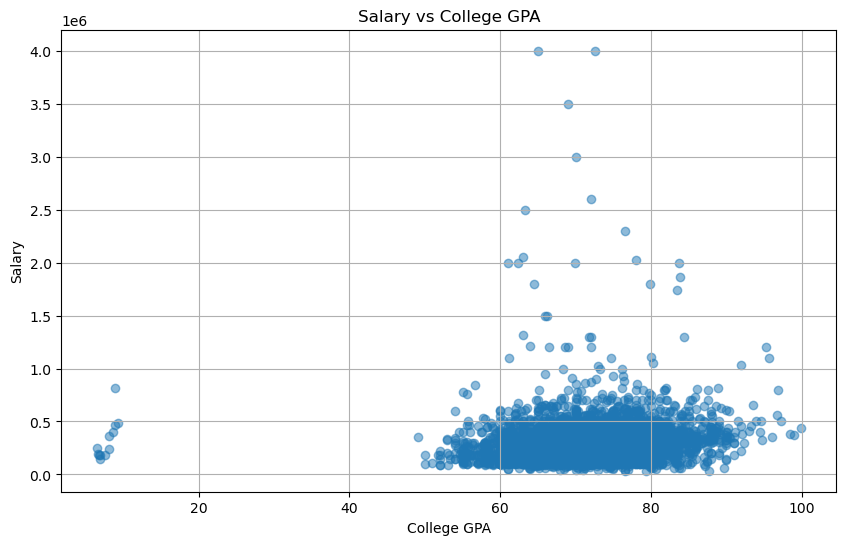

In [15]:
# Scatter plot: Salary vs 10th Percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='10percentage', y='Salary', data=df)
plt.xlabel('10th Percentage')
plt.ylabel('Salary')
plt.title('Scatter Plot: Salary vs 10th Percentage')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot: Salary vs 12th Percentage
plt.figure(figsize=(10, 6))
plt.scatter(df['12percentage'], df['Salary'], alpha=0.5)
plt.title('Salary vs 12th Percentage')
plt.xlabel('12th Percentage')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# Scatter plot: Salary vs College GPA
plt.figure(figsize=(10, 6))
plt.scatter(df['collegeGPA'], df['Salary'], alpha=0.5)
plt.title('Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


It appears that there exists a positive correlation between 10th percentage and salary, particularly for scores surpassing 70%. This implies that individuals with higher 10th percentage tend to receive higher salaries, with the majority falling within the 1 to 5 lakhs range. However, exceptions exist where certain individuals with elevated 10th percentage earn salaries exceeding 5 lakhs yet remain below 10 lakhs. Furthermore, it's worth noting that no individuals with below-average 10th percentage seem to earn salaries surpassing 5 lakhs. This underscores the potential significance of academic performance in influencing salary, at least within the confines of this dataset.

The density of data points for both '12th Percentage' and 'College GPA' appears to be concentrated within a narrower range compared to '10th Percentage'. This hints at a higher level of consistency or clustering of data around specific values within these variables, suggesting a potentially stronger relationship with salary within these ranges.







c:\Users\dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 92.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 94.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 94.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\dell\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 81.1% of the points cann

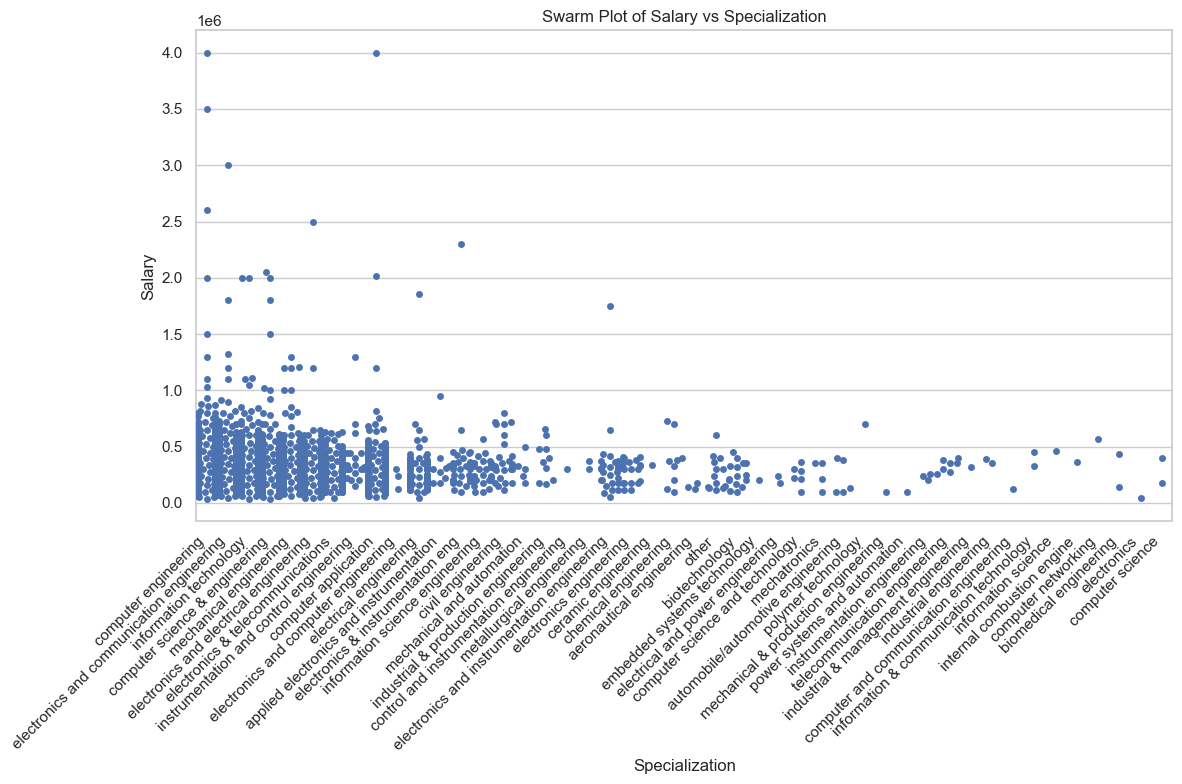

In [16]:
# Set the style to whitegrid
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(12, 8))

# Generate a swarm plot for Salary vs Specialization
sns.swarmplot(x="Specialization", y="Salary", data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set plot title and axis labels
plt.title('Swarm Plot of Salary vs Specialization')
plt.xlabel('Specialization')
plt.ylabel('Salary')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


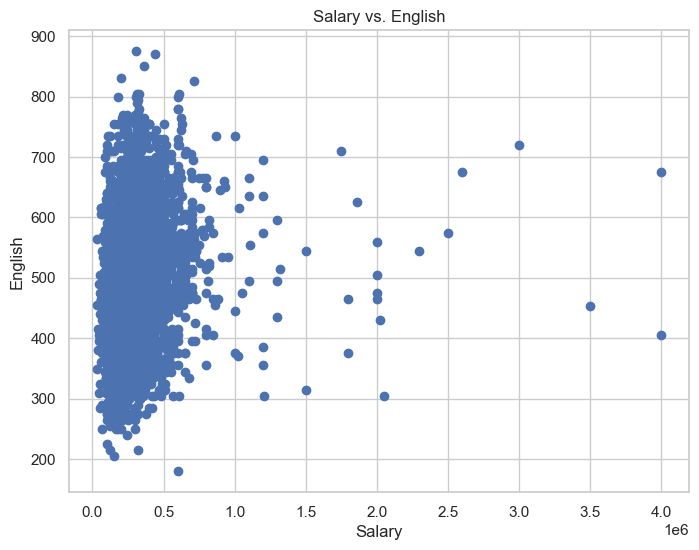

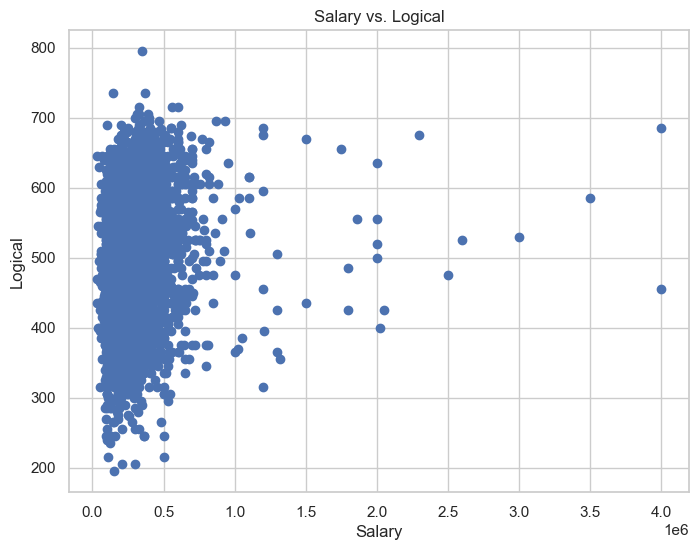

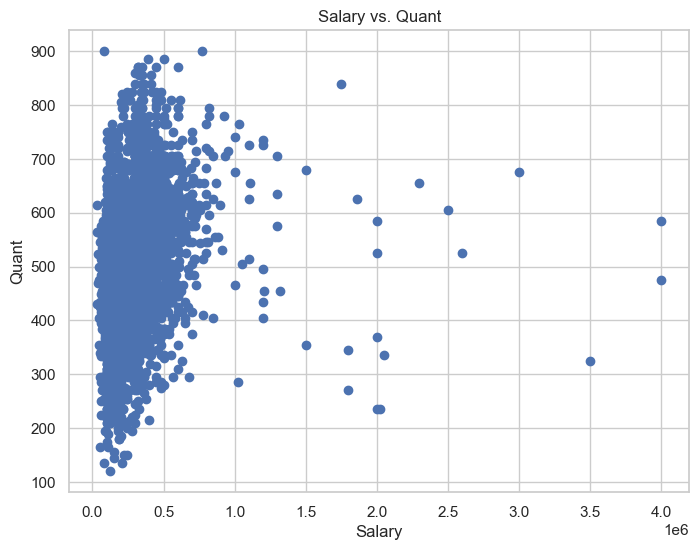

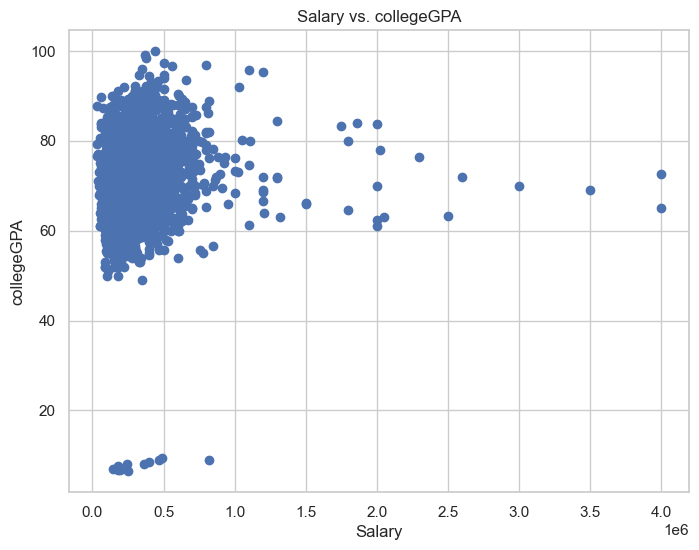

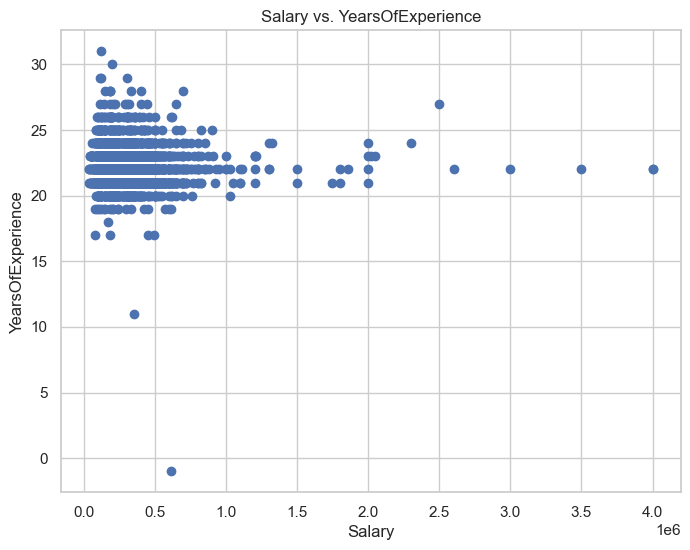

In [17]:
# Calculate years of experience
df["YearsOfExperience"] = (df["DOJ"] - df["DOB"]) // pd.Timedelta(days=365)

# Create scatter plots
numerical_variables = ["English", "Logical", "Quant", "collegeGPA", "YearsOfExperience"]
for var in numerical_variables:
    # Define figure size
    plt.figure(figsize=(8, 6))
    
    # Plot scatter plot
    plt.scatter(df["Salary"], df[var])
    
    # Set labels and title
    plt.xlabel("Salary")
    plt.ylabel(var)
    plt.title(f"Salary vs. {var}")
    
    # Add grid
    plt.grid(True)
    
    # Show plot
    plt.show()


### overall trend
An apparent trend emerges revealing a mild positive correlation between salary and English, Logical, CollegeGPA, and Quant score. This implies that as English scores increase, there's a tendency for salary to rise as well, albeit the relationship isn't notably strong.

Furthermore, there appears to be a positive correlation between salary and years of experience, suggesting that with increased years of experience, there's a tendency for salary to ascend. The trend seems somewhat linear, albeit with some dispersion in the data points.

### Data Distribution:
The distribution of data points exhibits a degree of scatter, indicating variability in salary across different score levels. Several outliers are notable, characterized by high scores juxtaposed with relatively lower salaries. These outliers might stem from factors beyond English proficiency, such as experience, skills, or qualifications in other domains.

Additionally, the concentration of data points predominantly lies within the lower range of years of experience and salary, with a sparser distribution at higher levels. This implies a probable scarcity of individuals with extensive experience or higher salary levels within the dataset. Notably, some outliers are discernible, depicting high years of experience coupled with relatively lower salaries, indicative of other influencing factors beyond experience.

### Interpretation:
While higher scores exhibit a marginal association with slightly elevated salaries within this dataset, it's imperative to discern that correlation doesn't necessarily denote causation. Various unaccounted factors might also influence salary outcomes beyond the variables scrutinized in this analysis.

The feeble correlation underscores that English score alone doesn't serve as a robust predictor of salary within this dataset. Other variables like experience, specific skills, or job roles might wield more significant influence.

The affirmative correlation suggests that experience significantly contributes to determining salary within this dataset. Individuals with greater experience tend to garner higher salaries, on average. Nonetheless, it's crucial to acknowledge that correlation doesn't imply causation, and other unexplored factors might also play pivotal roles in shaping salary dynamics.







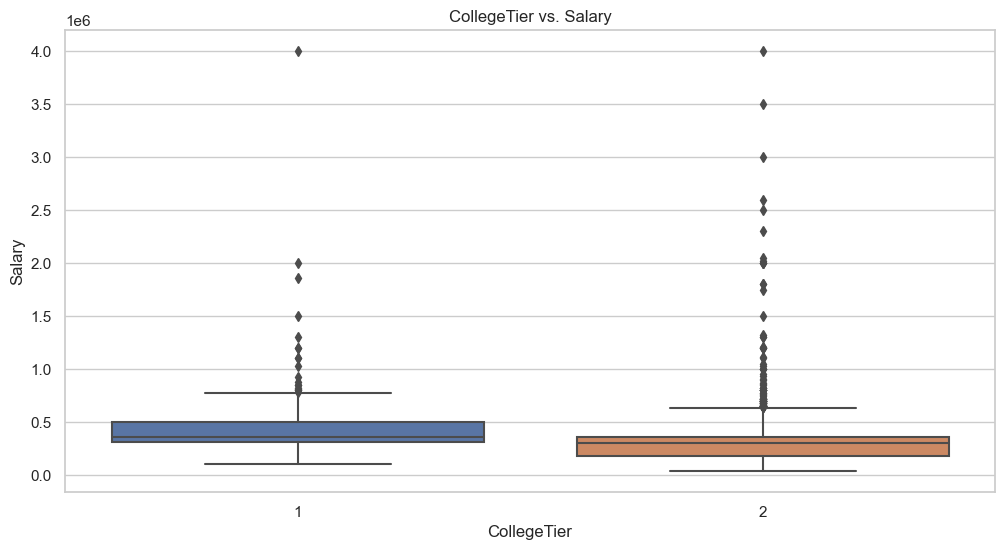

In [18]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a boxplot to visualize the relationship between CollegeTier and Salary
sns.boxplot(y="Salary", x="CollegeTier", data=df)

# Set the title of the plot
plt.title("CollegeTier vs. Salary")

# Show the plot
plt.show()



### Interpretation
The central tendency for salary falls between 3 to 5 LPA for both tier one and tier two colleges. However, there are more outliers in tier two colleges compared to tier one.

In [19]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('data.xlsx')

# Define job roles and convert them to lowercase
job_roles = ['Programmer Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
job_roles = [role.lower() for role in job_roles]

# Create an empty dictionary to store average salary by designation
average_salary_by_designation = {}

# Iterate over each job role
for designation in job_roles:
    # Filter the DataFrame for the current job role
    designation_df = df[df['Designation'].str.lower() == designation]
    
    # Calculate the average salary for the current job role
    average_salary = designation_df['Salary'].mean()
    
    # Store the average salary in the dictionary
    average_salary_by_designation[designation] = average_salary

# Print the average salary for each job role
for designation, average_salary in average_salary_by_designation.items():
    print(f"Average salary for {designation}: {average_salary}")


Average salary for programmer analyst: 339784.1726618705
Average salary for software engineer: 341215.2133580705
Average salary for hardware engineer: 281250.0
Average salary for associate engineer: 290000.0


The assertion made in a January 18, 2019 Times of India article suggests that fresh graduates, upon completing their Computer Science Engineering degree, have the potential to earn between 2.5 to 3 lakhs if they pursue careers as a Programming Analyst, Software Engineer, Hardware Engineer, or Associate Engineer. Upon examination of the provided data, it appears that this claim holds true, as the average salary for such roles indeed falls within the specified range for fresh graduates.

In [20]:
specialization_df = df['Specialization'].unique()

print(specialization_df)

['computer engineering' 'electronics and communication engineering'
 'information technology' 'computer science & engineering'
 'mechanical engineering' 'electronics and electrical engineering'
 'electronics & telecommunications'
 'instrumentation and control engineering' 'computer application'
 'electronics and computer engineering' 'electrical engineering'
 'applied electronics and instrumentation'
 'electronics & instrumentation eng' 'information science engineering'
 'civil engineering' 'mechanical and automation'
 'industrial & production engineering'
 'control and instrumentation engineering' 'metallurgical engineering'
 'electronics and instrumentation engineering' 'electronics engineering'
 'ceramic engineering' 'chemical engineering' 'aeronautical engineering'
 'other' 'biotechnology' 'embedded systems technology'
 'electrical and power engineering' 'computer science and technology'
 'mechatronics' 'automobile/automotive engineering' 'polymer technology'
 'mechanical & product

In [21]:
import pandas as pd

# List of specializations
specializations = ['computer engineering', 'electronics and communication engineering',
                   'information technology', 'computer science & engineering',
                   'mechanical engineering', 'electronics and electrical engineering',
                   'electronics & telecommunications', 'instrumentation and control engineering',
                   'computer application', 'electronics and computer engineering',
                   'electrical engineering', 'applied electronics and instrumentation',
                   'electronics & instrumentation eng', 'information science engineering',
                   'civil engineering', 'mechanical and automation',
                   'industrial & production engineering', 'control and instrumentation engineering',
                   'metallurgical engineering', 'electronics and instrumentation engineering',
                   'electronics engineering', 'ceramic engineering', 'chemical engineering',
                   'aeronautical engineering', 'other', 'biotechnology',
                   'embedded systems technology', 'electrical and power engineering',
                   'computer science and technology', 'mechatronics',
                   'automobile/automotive engineering', 'polymer technology',
                   'mechanical & production engineering', 'power systems and automation',
                   'instrumentation engineering', 'telecommunication engineering',
                   'industrial & management engineering', 'industrial engineering',
                   'computer and communication engineering', 'information & communication technology',
                   'information science', 'internal combustion engine', 'computer networking',
                   'biomedical engineering', 'electronics', 'computer science']

# Convert specialization names to lowercase
df['Specialization'] = df['Specialization'].str.lower()

# Count occurrences of each specialization
specialization_counts = {}
for specialization in specializations:
    count = df[df['Specialization'] == specialization].shape[0]
    specialization_counts[specialization] = count

# Create DataFrame from specialization counts and sort by count
specialization_df = pd.DataFrame.from_dict(specialization_counts, orient='index', columns=['Count'])
specialization_df = specialization_df.sort_values(by='Count', ascending=False)

# Display the DataFrame
print(specialization_df)

# Mapping of specializations to categories
specialization_categories = {
    'computer engineering': 'CS', 'electronics and communication engineering': 'EC',
    'information technology': 'CS', 'computer science & engineering': 'CS',
    'mechanical engineering': 'ME', 'electronics and electrical engineering': 'EC',
    'electronics & telecommunications': 'EC', 'instrumentation and control engineering': 'EC',
    'computer application': 'CS', 'electronics and computer engineering': 'EC',
    'electrical engineering': 'EC', 'applied electronics and instrumentation': 'EC',
    'electronics & instrumentation eng': 'EC', 'information science engineering': 'CS',
    'civil engineering': 'CIV', 'mechanical and automation': 'ME',
    'industrial & production engineering': 'ME', 'control and instrumentation engineering': 'EC',
    'metallurgical engineering': 'ME', 'electronics and instrumentation engineering': 'EC',
    'electronics engineering': 'EC', 'ceramic engineering': 'CIV', 'chemical engineering': 'CIV',
    'aeronautical engineering': 'ME', 'other': 'Other', 'biotechnology': 'Other',
    'embedded systems technology': 'EC', 'electrical and power engineering': 'EC',
    'computer science and technology': 'CS', 'mechatronics': 'ME',
    'automobile/automotive engineering': 'ME', 'polymer technology': 'Other',
    'mechanical & production engineering': 'ME', 'power systems and automation': 'EC',
    'instrumentation engineering': 'EC', 'telecommunication engineering': 'EC',
    'industrial & management engineering': 'ME', 'industrial engineering': 'ME',
    'computer and communication engineering': 'EC', 'information & communication technology': 'CS',
    'information science': 'CS', 'internal combustion engine': 'ME', 'computer networking': 'CS',
    'biomedical engineering': 'Other', 'electronics': 'EC', 'computer science': 'CS'
}

# Map specializations to categories
df['Specialization'] = df['Specialization'].str.lower()
df['Category'] = df['Specialization'].map(specialization_categories)


                                             Count
electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrum

Chi-Squared Statistic: 104.46891913608455
P-value: 1.2453868176976918e-06
There is a significant relationship between gender and specialization.


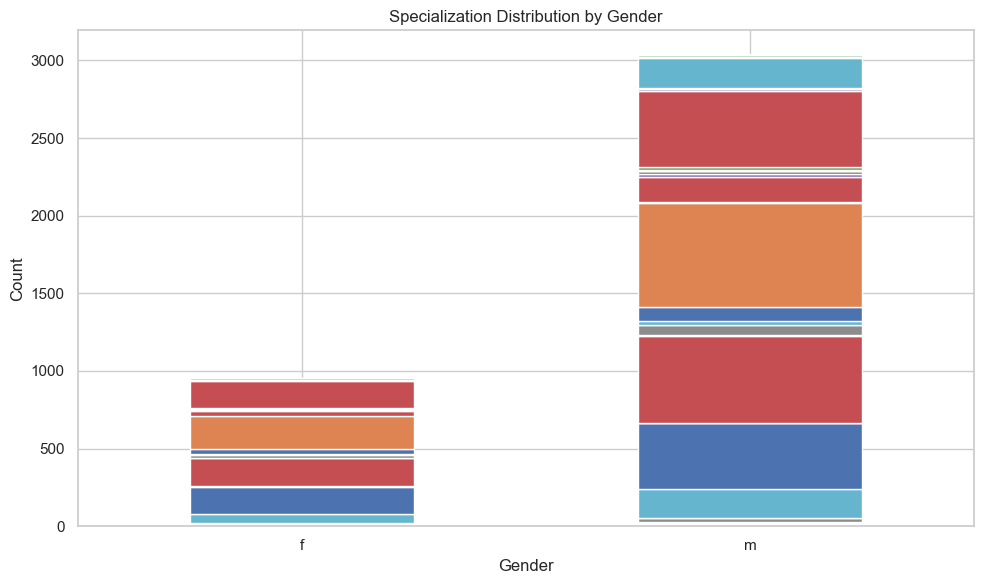

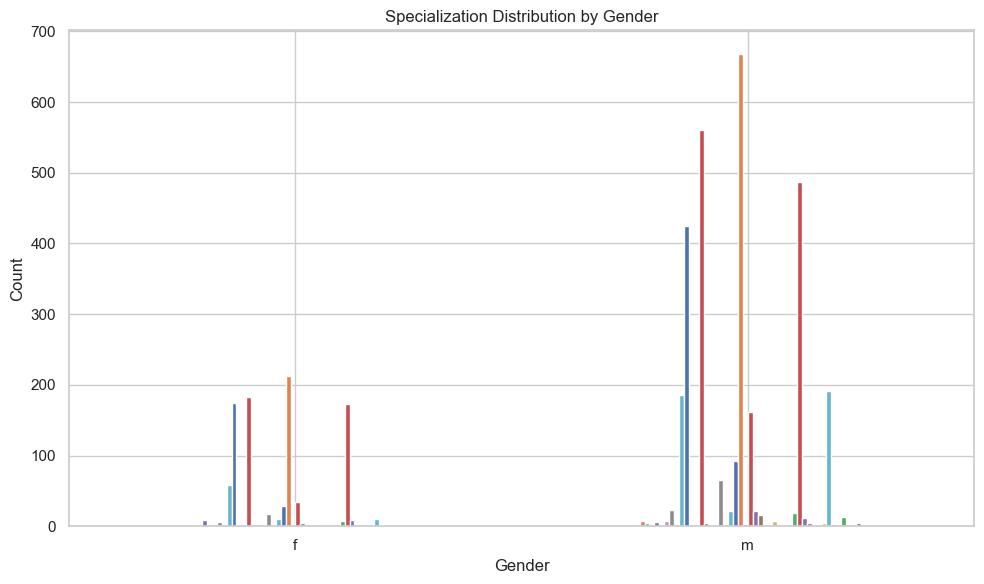

In [22]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

# Perform chi-square test
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print("Chi-Squared Statistic:", chi2_stat)
print("P-value:", p_val)

# Determine significance
alpha = 0.05
if p_val < alpha:
    print("There is a significant relationship between gender and specialization.")
else:
    print("There is no significant relationship between gender and specialization.")

# Plot stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Specialization Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.legend().remove()  
plt.tight_layout()
plt.show()

# Plot individual bar chart
contingency_table.plot(kind='bar', figsize=(10, 6))
plt.title('Specialization Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend().remove()   
plt.tight_layout()
plt.show()


Observing both the chi-square test results and the count plot, it becomes evident that the choice of specialization appears to be influenced by gender.






